# Téléchargement du projet

In [1]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [24.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [237 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/univer

In [2]:
from google.colab import files
files.upload()

Saving new_yolo.zip to new_yolo.zip


#Install Open CV (Optionnel)

In [3]:
!apt install libopencv*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libopencv3.2-java' for glob 'libopencv*'
Note, selecting 'libopencv-photo3.2' for glob 'libopencv*'
Note, selecting 'libopencv-core-dev' for glob 'libopencv*'
Note, selecting 'libopencv-gpu-dev' for glob 'libopencv*'
Note, selecting 'libopencv-apps0d' for glob 'libopencv*'
Note, selecting 'libopencv-video3.2' for glob 'libopencv*'
Note, selecting 'libopencv-calib3d-dev' for glob 'libopencv*'
Note, selecting 'libopencv-ml-dev' for glob 'libopencv*'
Note, selecting 'libopencv-imgcodecs3.2' for glob 'libopencv*'
Note, selecting 'libopencv-imgproc2.4v5' for glob 'libopencv*'
Note, selecting 'libopencv-shape-dev' for glob 'libopencv*'
Note, selecting 'libopencv-imgcodecs-dev' for glob 'libopencv*'
Note, selecting 'libopencv-apps-dev' for glob 'libopencv*'
Note, selecting 'libopencv-highgui3.2' for glob 'libopencv*'
Note, selecting 'libopencv-calib3d3.2' for glob 'libopencv*'
Note

#Install Cuda

In [4]:
!apt install cuda-9-2 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  acpid ca-certificates-java cuda-compiler-9-2 cuda-cublas-dev-9-2
  cuda-cufft-dev-9-2 cuda-curand-dev-9-2 cuda-cusolver-dev-9-2
  cuda-cusparse-dev-9-2 cuda-demo-suite-9-2 cuda-documentation-9-2
  cuda-drivers cuda-libraries-dev-9-2 cuda-npp-dev-9-2 cuda-nsight-9-2
  cuda-nvgraph-dev-9-2 cuda-nvml-dev-9-2 cuda-nvprune-9-2 cuda-nvrtc-dev-9-2
  cuda-nvvp-9-2 cuda-runtime-9-2 cuda-samples-9-2 cuda-toolkit-9-2
  cuda-tools-9-2 cuda-visual-tools-9-2 dbus default-jre default-jre-headless
  dkms dmsetup fakeroot fonts-dejavu-core fonts-dejavu-extra freeglut3
  freeglut3-dev java-common keyboard-configuration kmod lib32gcc1 libapparmor1
  libargon2-0 libasound2 libasound2-data libatk-wrapper-java
  libatk-wrapper-java-jni libc6-i386 libcap2 libcryptsetup12 libcuda1-396
  libdevmapper1.02.1 libdrm-dev libfakeroot libfontenc1 libgl1-mesa-dev
  lib

# Décompresser le fichier

In [5]:
!unzip new_yolo.zip

Archive:  new_yolo.zip
   creating: darknet-master/
  inflating: darknet-master/.gitignore  
   creating: darknet-master/cfg/
  inflating: darknet-master/cfg/alexnet.cfg  
  inflating: darknet-master/cfg/cifar.cfg  
  inflating: darknet-master/cfg/cifar.test.cfg  
  inflating: darknet-master/cfg/coco.data  
  inflating: darknet-master/cfg/combine9k.data  
  inflating: darknet-master/cfg/darknet.cfg  
  inflating: darknet-master/cfg/darknet19.cfg  
  inflating: darknet-master/cfg/darknet19_448.cfg  
  inflating: darknet-master/cfg/darknet53.cfg  
  inflating: darknet-master/cfg/darknet53_448.cfg  
  inflating: darknet-master/cfg/darknet9000.cfg  
  inflating: darknet-master/cfg/densenet201.cfg  
  inflating: darknet-master/cfg/extraction.cfg  
  inflating: darknet-master/cfg/extraction.conv.cfg  
  inflating: darknet-master/cfg/extraction22k.cfg  
  inflating: darknet-master/cfg/go.cfg  
  inflating: darknet-master/cfg/go.test.cfg  
  inflating: darknet-master/cfg/gru.cfg  
  inflating:

#Accès au dossier

In [6]:
cd darknet-master/

/content/darknet-master


# Désactiver / Activer des modules

In [0]:
!sed -i 's/OPENMP=0/OPENMP=1/g' Makefile

In [0]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [0]:
!sed -i 's/OPENCV=1/OPENCV=0/g' Makefile

# Compiler le projet

In [10]:
!make 

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -O0 -g -DGPU -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -O0 -g -DGPU -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -O0 -g -DGPU -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -O0 -g -DGPU -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -O0 -g -DGPU -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Is

# Télécharger le fichier des poids

In [11]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


--2018-10-28 14:44:39--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  52.5MB/s    in 3.0s    

2018-10-28 14:44:42 (52.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#Convertir les fichiers en format Linux

In [0]:
 !awk '{ sub("\r$", ""); print }' keys_detection/test.txt > test.txt

In [0]:
 !awk '{ sub("\r$", ""); print }' keys_detection/train.txt > train.txt

In [0]:
 !awk '{ sub("\r$", ""); print }' keys_detection/obj.data > obj.data

#Supprimer les anciens fichiers "test.txt, train.txt, obj.data"

In [0]:
!rm keys_detection/test.txt

In [0]:
!rm keys_detection/train.txt

In [0]:
!rm keys_detection/obj.data

# Copier les nouveaux fichiers "test.txt, train.txt, obj.data"

In [0]:
! cp test.txt keys_detection/test.txt

In [0]:
! cp train.txt keys_detection/train.txt

In [0]:
! cp obj.data keys_detection/obj.data

# Calcul des Anchors pour YOLO V3

In [0]:
!./darknet detector calc_anchors keys_detection/obj.data -num_of_clusters 9 -width 32 -height 32

#Changement des anchors

In [0]:
!sed -i 's/anchors = 76.9214,98.6725, 138.4694,118.9867, 107.6484,213.5067, 228.5392,196.2330, 200.8712,298.5720, 372.4629,199.0184, 278.7306,314.8459, 366.2672,287.3742, 391.1703,367.6294/anchors = 5.9170,7.5902, 10.6515,9.1528, 8.2806,16.4236, 17.5799,15.0948, 15.4516,22.9671, 28.6510,15.3091, 21.4408,24.2189, 28.1744,22.1057, 30.0900,28.2792/g' keys_detection/yolov3-voc.cfg

# Lancer l'entrainnement

In [0]:
!./darknet detector train keys_detection/obj.data keys_detection/yolov3-voc.cfg darknet53.conv.74 &> outputTrain.txt

In [0]:
files.download('outputTrain.txt')

#Télécharger une image de test

In [25]:
!wget -O test.jpg https://cdn.pixabay.com/photo/2017/03/16/08/35/key-2148476_960_720.jpg

--2018-10-28 23:29:23--  https://cdn.pixabay.com/photo/2017/03/16/08/35/key-2148476_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 213.239.228.180, 213.239.228.134, 213.239.228.182, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|213.239.228.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203433 (199K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 198.67K   937KB/s    in 0.2s    

2018-10-28 23:29:24 (937 KB/s) - ‘test.jpg’ saved [203433/203433]



In [26]:
!wget -O test3.jpg http://www.clique.tv/wp-content/uploads/2015/03/trousseau.jpg

--2018-10-28 23:29:25--  http://www.clique.tv/wp-content/uploads/2015/03/trousseau.jpg
Resolving www.clique.tv (www.clique.tv)... 23.45.134.15
Connecting to www.clique.tv (www.clique.tv)|23.45.134.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193679 (189K) [image/jpeg]
Saving to: ‘test3.jpg’

test3.jpg           100%[===================>] 189.14K  --.-KB/s    in 0.03s   

2018-10-28 23:29:26 (5.34 MB/s) - ‘test3.jpg’ saved [193679/193679]



In [27]:
!wget -O test4.jpg http://www.trouve-perdu.com/sites/default/files/2012_11/IMG_0767.JPG

--2018-10-28 23:29:29--  http://www.trouve-perdu.com/sites/default/files/2012_11/IMG_0767.JPG
Resolving www.trouve-perdu.com (www.trouve-perdu.com)... 109.234.161.34
Connecting to www.trouve-perdu.com (www.trouve-perdu.com)|109.234.161.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11510 (11K) [image/jpeg]
Saving to: ‘test4.jpg’

test4.jpg           100%[===================>]  11.24K  --.-KB/s    in 0s      

2018-10-28 23:29:29 (160 MB/s) - ‘test4.jpg’ saved [11510/11510]



In [28]:
!wget -O test5.jpg  https://t4.ftcdn.net/jpg/00/30/23/85/500_F_30238526_Ha8aRLTOSSAuqPEAcAMFaOvEdq0BW1Be.jpg

--2018-10-28 23:29:32--  https://t4.ftcdn.net/jpg/00/30/23/85/500_F_30238526_Ha8aRLTOSSAuqPEAcAMFaOvEdq0BW1Be.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47512 (46K) [image/jpeg]
Saving to: ‘test5.jpg’

test5.jpg           100%[===================>]  46.40K  --.-KB/s    in 0.02s   

2018-10-28 23:29:33 (2.30 MB/s) - ‘test5.jpg’ saved [47512/47512]



In [29]:
!./darknet detector test  keys_detection/obj.data keys_detection/yolov3-voc.cfg keys_detection/backup/yolov3-voc_300.weights  test.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1    32 x  32 x   3   ->    32 x  32 x  32  0.002 BFLOPs
    1 conv     64  3 x 3 / 2    32 x  32 x  32   ->    16 x  16 x  64  0.009 BFLOPs
    2 conv     32  1 x 1 / 1    16 x  16 x  64   ->    16 x  16 x  32  0.001 BFLOPs
    3 conv     64  3 x 3 / 1    16 x  16 x  32   ->    16 x  16 x  64  0.009 BFLOPs
    4 res    1                  16 x  16 x  64   ->    16 x  16 x  64
    5 conv    128  3 x 3 / 2    16 x  16 x  64   ->     8 x   8 x 128  0.009 BFLOPs
    6 conv     64  1 x 1 / 1     8 x   8 x 128   ->     8 x   8 x  64  0.001 BFLOPs
    7 conv    128  3 x 3 / 1     8 x   8 x  64   ->     8 x   8 x 128  0.009 BFLOPs
    8 res    5                   8 x   8 x 128   ->     8 x   8 x 128
    9 conv     64  1 x 1 / 1     8 x   8 x 128   ->     8 x   8 x  64  0.001 BFLOPs
   10 conv    128  3 x 3 / 1     8 x   8 x  64   ->     8 x   8 x 128  0.009 BFLOPs
   11 res    8                   8 x 

#Tester le Model

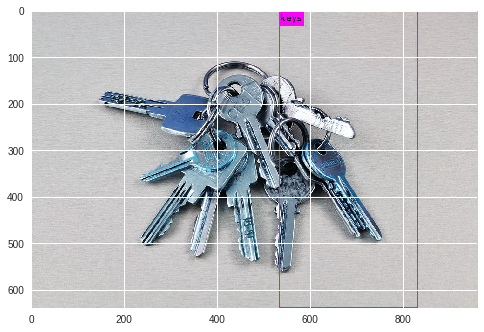

In [30]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('predictions.jpg',1)
plt.imshow(img)